In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn import cluster, mixture
import sklearn

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


# models
from sklearn.cluster import KMeans

# metrics
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score


In [6]:
df = pd.read_csv("../../data/after_fe_data.csv")

In [7]:
def visualize_pca_dataset_labels(dataframe, labels):
    # Perform PCA on the dataframe
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(dataframe)
    print(pca_data.shape)
    print(pca_data[:, 0].shape)
    print(pca_data[:, 1].shape)

    # Create a scatter plot of the PCA data with labels as colors
    plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA Visualization with Labels')
    plt.colorbar(label='Labels')
    plt.show()


def visualize_tsne_dataset_labels(dataframe, labels):
    # Perform t-SNE on the dataframe
    tsne = TSNE(n_components=2, random_state=0)
    tsne_data = tsne.fit_transform(dataframe)
    
    # Create a scatter plot of the t-SNE data with labels as colors
    plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=labels)
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.title('t-SNE Visualization with Labels')
    plt.colorbar(label='Labels')
    plt.show()

## KMEANS

### Choosing number of clusters  

In [14]:
def metrics_plots(df, max_k):

    score = []
    score_kmeans_s = []
    score_kmeans_c = []
    score_kmeans_d = []

    for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, random_state= 101)
        predictions = kmeans.fit_predict(df)
        score.append(-1 * kmeans.score(df))
        score_kmeans_s.append(silhouette_score(df, kmeans.labels_))
        score_kmeans_c.append(calinski_harabasz_score(df, kmeans.labels_))
        score_kmeans_d.append(davies_bouldin_score(df, predictions))

    list_scores = [score, score_kmeans_s, score_kmeans_c, score_kmeans_d] 
    list_title = ['Within-cluster sum of squares', 'Silhouette Score', 'Calinski Harabasz', 'Davies Bouldin'] 
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    for i in range(len(list_scores)):
        x_ticks = list(range(2, len(list_scores[i]) + 2))
        ax[i//2, i%2].plot(x_ticks, list_scores[i])
        ax[i//2, i%2].set_title(list_title[i])
        ax[i//2, i%2].set_xlabel('Number of clusters')
        ax[i//2, i%2].set_ylabel('Score')
    plt.tight_layout()
    plt.show()

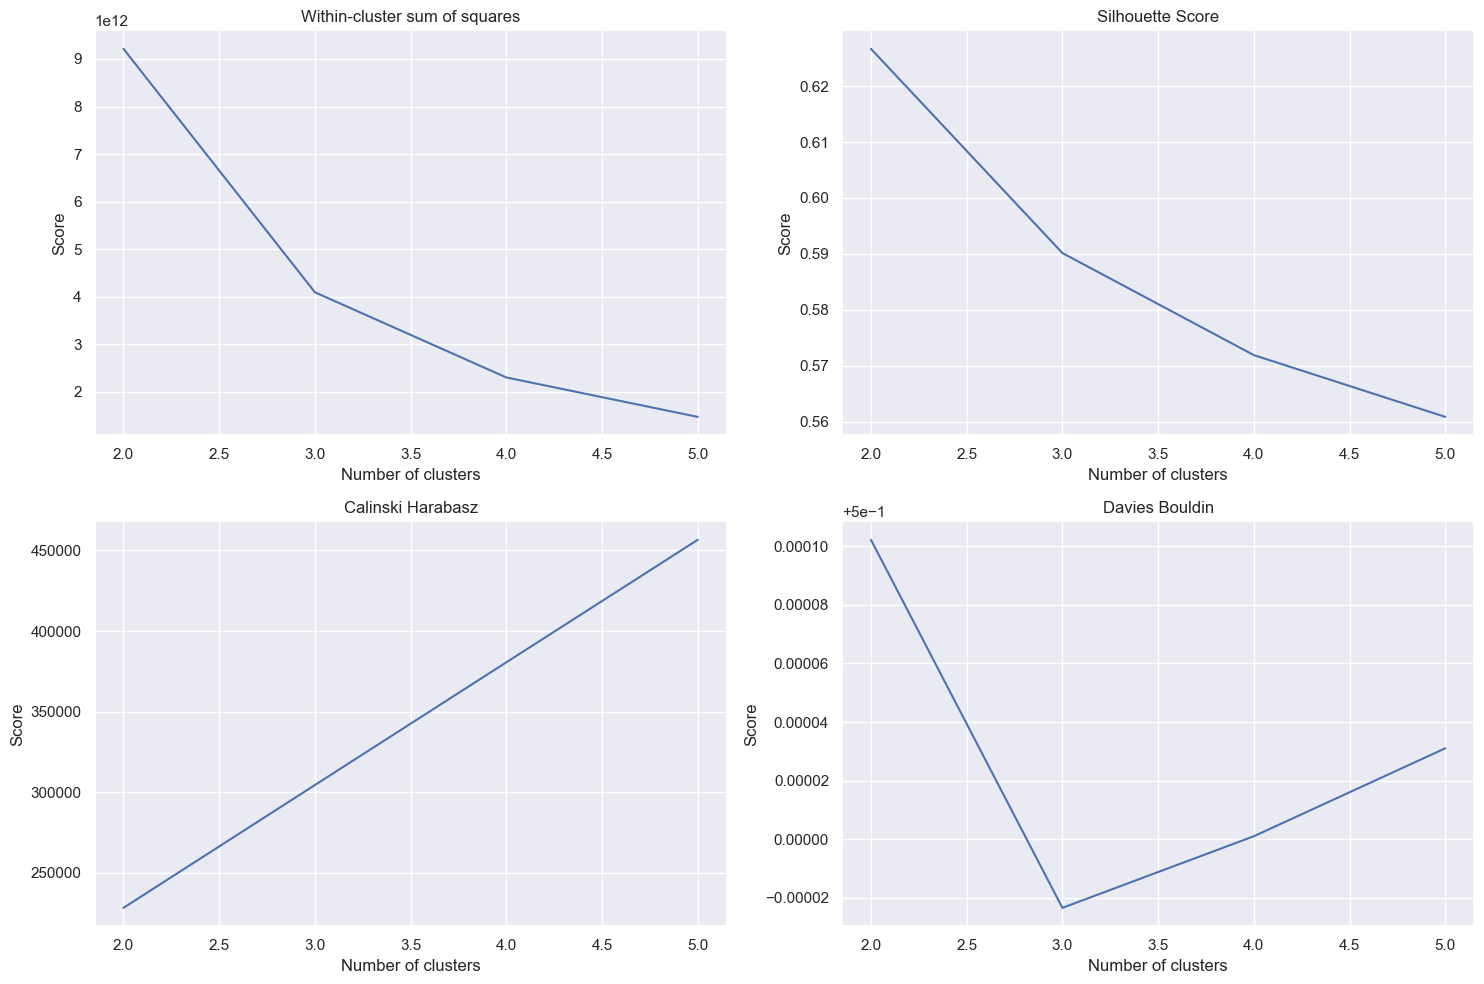

In [6]:
metrics_plots(df, 6)

### Implementing kmeans for 3 and 4 clusters

In [5]:
kmeans = KMeans(3, random_state=0)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=0)

In [ ]:
kmeans_4 = KMeans(4, random_state=0)
kmeans_4.fit(df)

### Visualizations

#### PCA

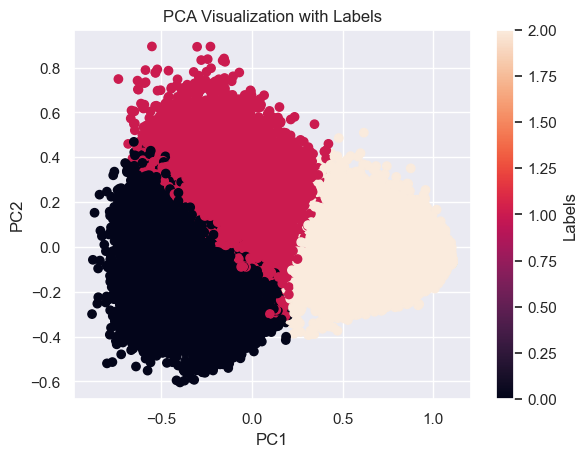

In [7]:
visualize_pca_dataset_labels(df, kmeans.labels_)

#### T-SNE

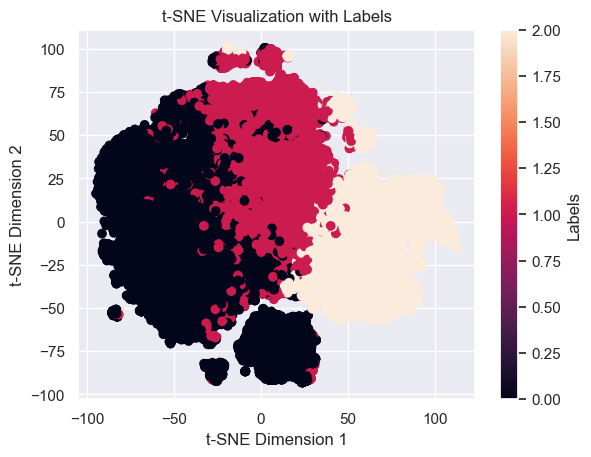

In [9]:
visualize_tsne_dataset_labels(df, kmeans.labels_)

##### t-sne kmeans with 4 clusters

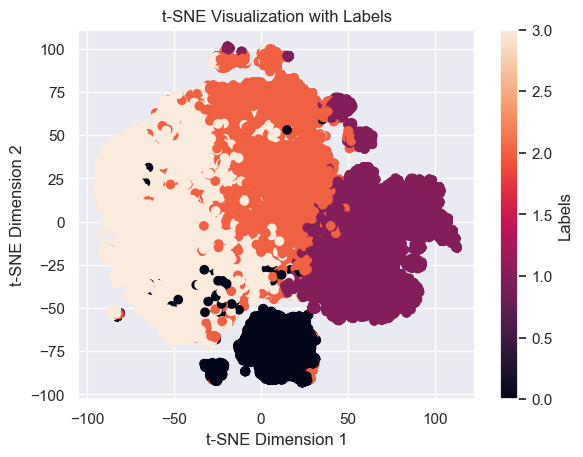

In [16]:
visualize_tsne_dataset_labels(df, kmeans_4.labels_)

## minibatch

In [27]:
miniBatch = cluster.MiniBatchKMeans(3)
miniBatch.fit(df)

MiniBatchKMeans(n_clusters=3)

In [25]:
miniBatch_4 = cluster.MiniBatchKMeans(4)
miniBatch_4.fit(df)

MiniBatchKMeans(n_clusters=4)

### Visualizations

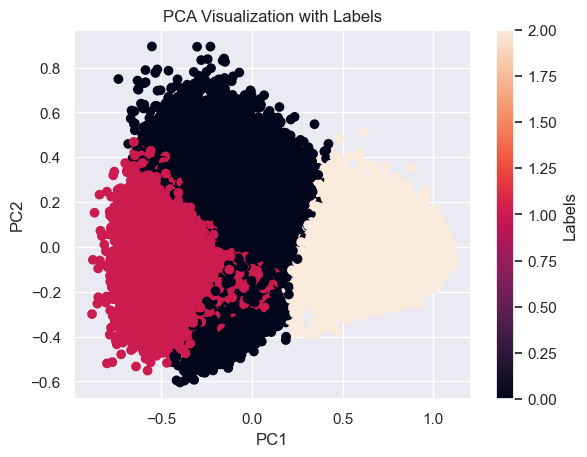

In [22]:
visualize_pca_dataset_labels(df, miniBatch.labels_)

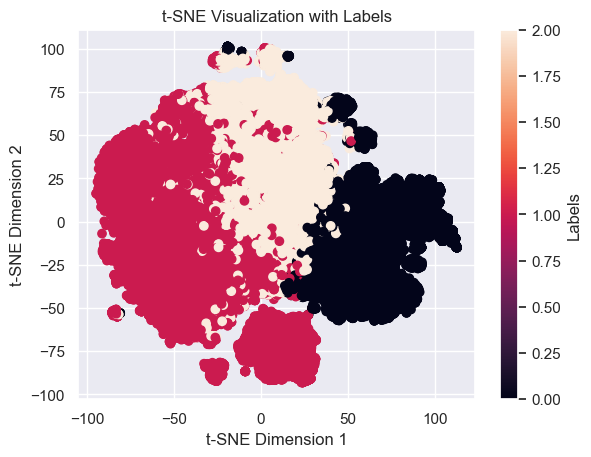

In [28]:
visualize_tsne_dataset_labels(df, miniBatch.labels_)

4 clusters:

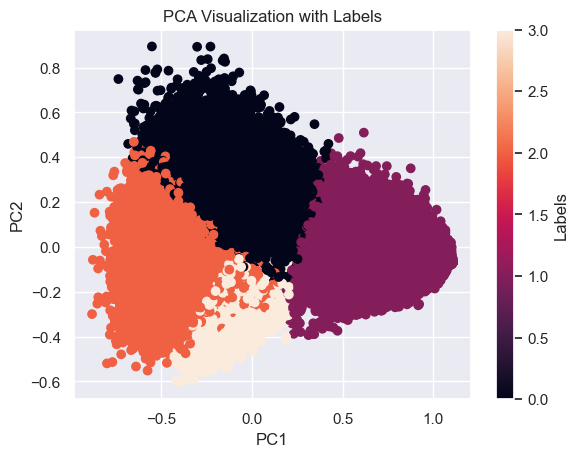

In [24]:
visualize_pca_dataset_labels(df, miniBatch_4.labels_)

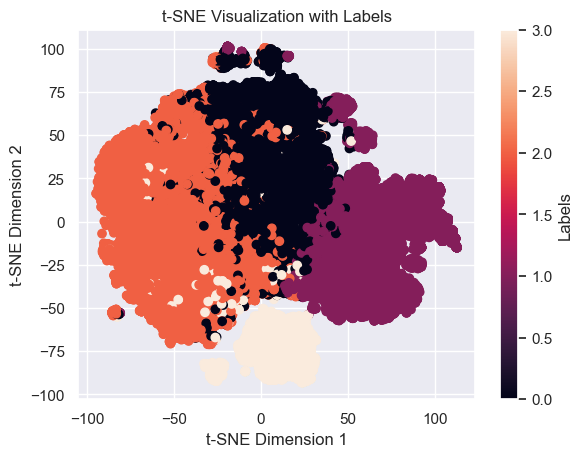

In [26]:
visualize_tsne_dataset_labels(df, miniBatch_4.labels_)

## DBSCAN

### choosing minPts ans eps parameters

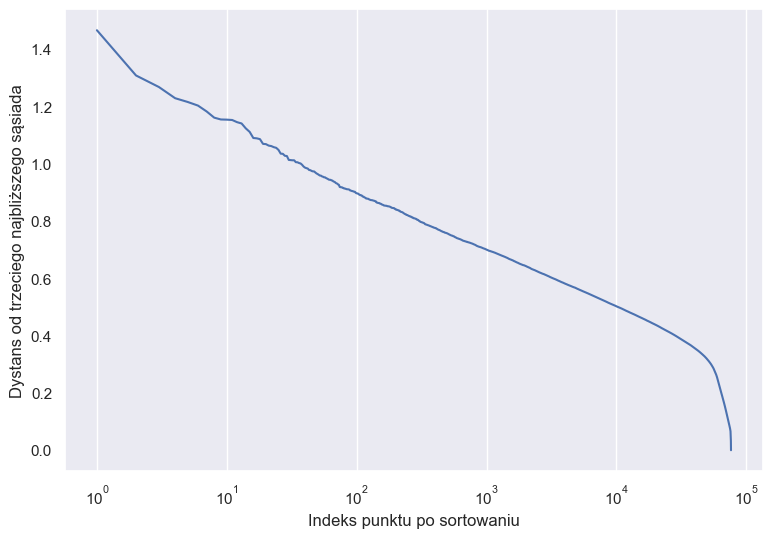

In [5]:
minPts = 70 # doubled number of dimentions

nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=minPts).fit(df)
distances, indices = nbrs.kneighbors(df)
distanceDec = sorted(distances[:,minPts-1], reverse=True)
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)

plt.xlabel('Indeks punktu po sortowaniu')
plt.ylabel('Dystans od trzeciego najbliższego sąsiada')
ax1.plot(list(range(1,df.shape[0]+1)), distanceDec)

plt.xscale('log')
plt.grid(axis='y')

plt.show()

In [22]:
eps = 1.1
minPts = 70
dbs = cluster.DBSCAN(eps=eps, min_samples=minPts)

In [23]:
dbs.fit(df)

: 

In [21]:
set(dbs.labels_)

{0, 1, 2, 3, 4}

### Visualization

In [ ]:
visualize_pca_dataset_labels(df, dbs.labels_)


## GMM

In [8]:
def _GMM(X, n_components, covariance_type='full'):
    gmm = mixture.GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    gmm.fit(X)
    return X, gmm

In [16]:
x, gmm = _GMM(df, 3)

In [12]:
gmm.predict(x)

array([1, 0, 2, ..., 0, 0, 0], dtype=int64)

### Visualizations

(76142, 2)
(76142,)
(76142,)


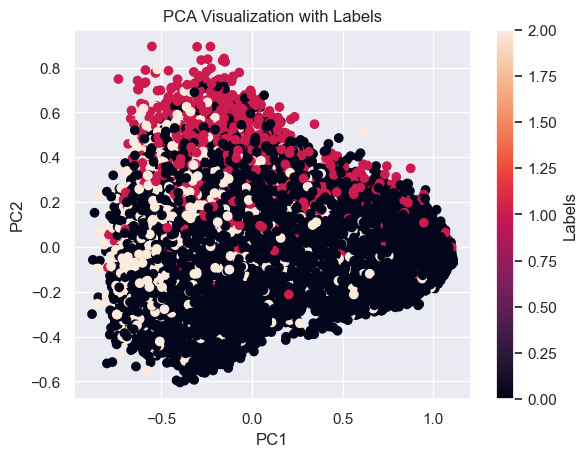

In [13]:
visualize_pca_dataset_labels(df, gmm.predict(x))

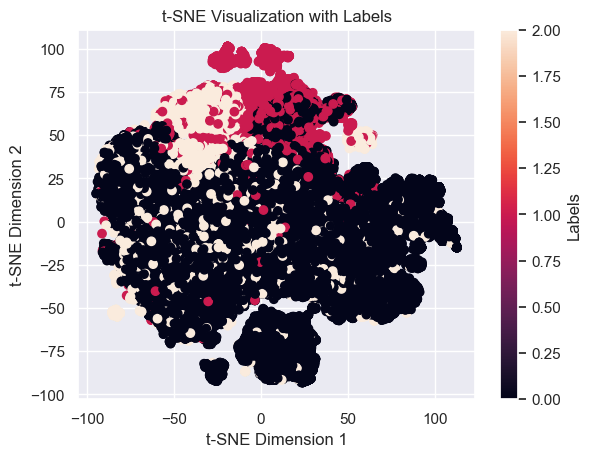

In [14]:
visualize_tsne_dataset_labels(df, gmm.predict(x))

for 4 clusters:

In [26]:
x, gmm_4 = _GMM(df, 4)

(76142, 2)
(76142,)
(76142,)


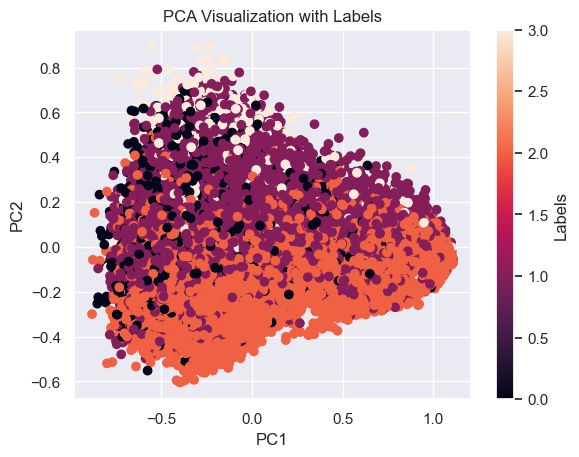

In [27]:
visualize_pca_dataset_labels(df, gmm_4.predict(x))

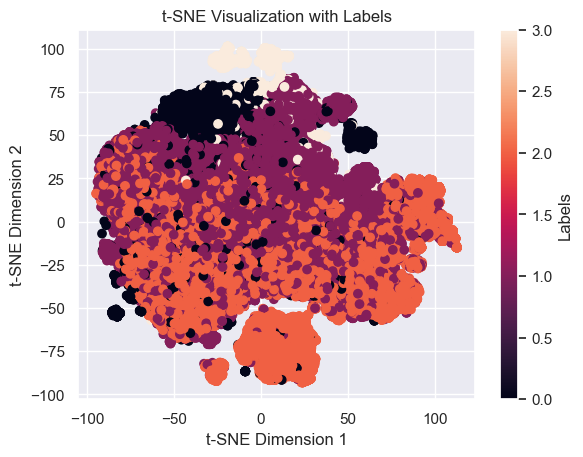

In [28]:
visualize_tsne_dataset_labels(df, gmm_4.predict(x))